# Explore here

In [3]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Guardar datos en crudo

df.to_csv('../data/raw/df.csv')

In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# 1338 columnas, 6 filas con todos los datos.

In [7]:
#duplicados

duplicados = df[df.duplicated]

duplicados

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.duplicated().sum()

np.int64(1)

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
#Calcular, en función de datos los fisiológicos de sus clientes, cuál va a ser la prima (coste) que debe asumir cada uno de ellos.
# Todas las variables son utiles para calcular la prima 

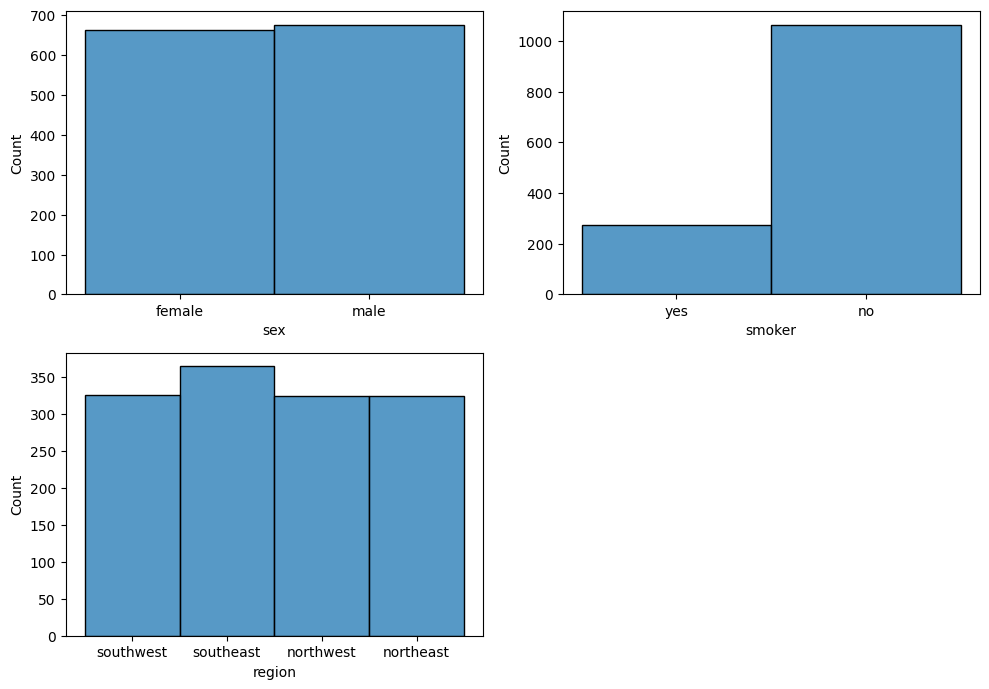

In [13]:
# Análisis univariante Categórico
# Variables Categoricas = sex , smoker , region

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots (2, 2, figsize=(10,7))

sns.histplot(ax = axis[0,0], data = df, x = "sex")
sns.histplot(ax = axis[0,1], data = df, x = "smoker")
sns. histplot(ax = axis[1,0], data= df, x = "region")

fig.delaxes(axis[1, 1])

plt.tight_layout()

plt.show()

In [ ]:
# el data set es casi 50/50 hombres y mujeres. Hay presencia mayoritaria de personas no fumadoras. Equidad en regiones salvo southest.

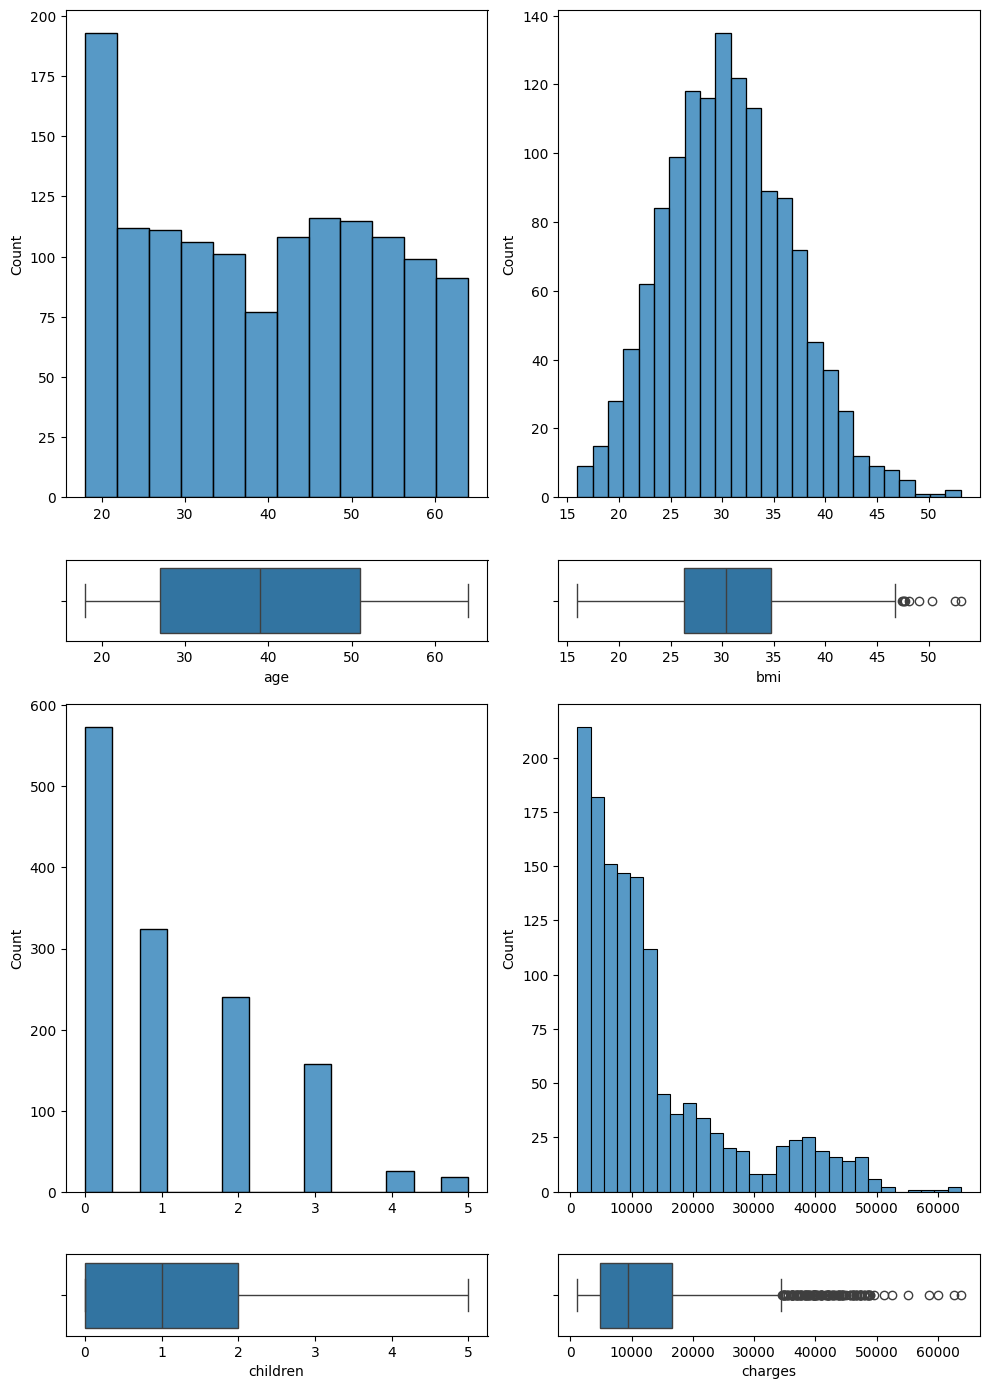

In [23]:
# Análisis univariante númerico
# Variables numéricas = age , bmi , children , charges

fig, axis = plt.subplots(4,2, figsize = (10,14), gridspec_kw = {'height_ratios': [6,1,6,1]})

sns.histplot(ax = axis[0,0], data = df, x = "age").set(xlabel = None)
sns.boxplot(ax = axis[1,0],data = df, x = "age")

sns.histplot(ax = axis[0,1], data = df, x = "bmi").set(xlabel = None)
sns.boxplot(ax = axis[1,1],data = df, x = "bmi")

sns.histplot(ax = axis[2,0], data = df, x = "children").set(xlabel = None)
sns.boxplot(ax = axis[3,0],data = df, x = "children")

sns.histplot(ax = axis[2,1], data = df, x = "charges").set(xlabel = None)
sns.boxplot(ax = axis[3,1],data = df, x = "charges")

plt.tight_layout()

plt.show()

In [ ]:
# el dataset tiene un rango de 20 a 60 años. Se puede ver un peak en los 20 años. El 50% de la muestra se encuentra entre 28 (aprox) y 50 años. La media es alrededor de 40 años
# el índice de masa corporal tiene una distribución normal.
# la media de hijos es 1
# la prima media rondea en los 10.000 USD. muchos outliers

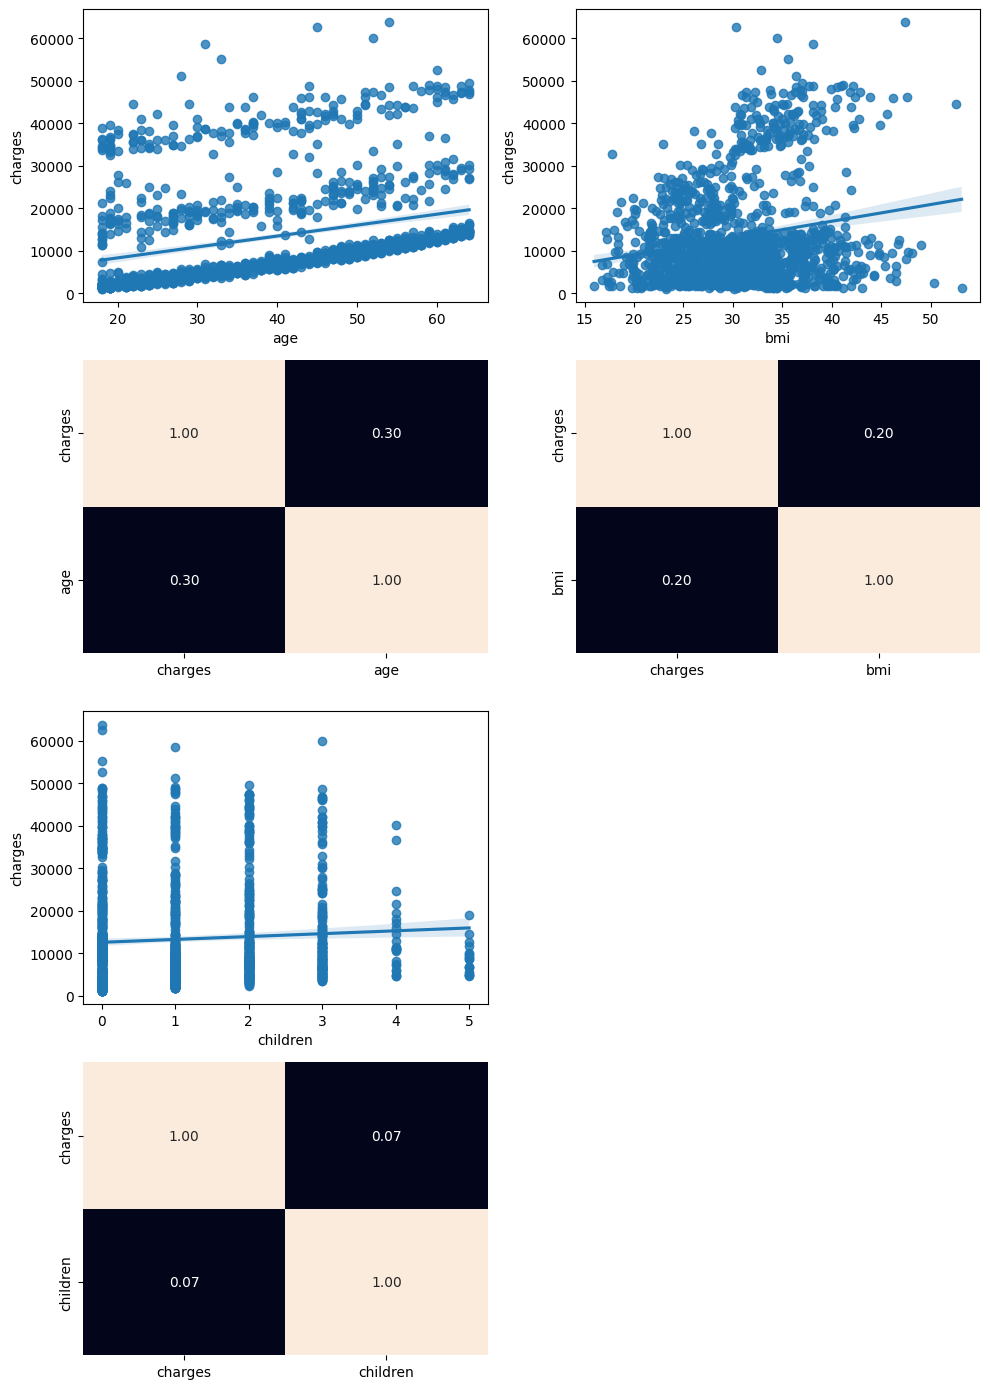

In [28]:
# Análisis multivariante Númerico-Númerico
# Variables numéricas = age , bmi , children , charges

fig, axis = plt.subplots(4, 2, figsize = (10, 14))

sns.regplot(ax = axis[0,0], data = df, x = "age", y = "charges")
sns.heatmap(ax = axis[1,0], data = df[["charges", "age"]].corr(), annot = True, fmt = ".2f", cbar = False)

sns.regplot(ax = axis[0,1], data = df, x = "bmi", y = "charges")
sns.heatmap(ax = axis[1,1], data = df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", cbar = False)

sns.regplot(ax = axis[2,0], data = df, x = "children", y = "charges")
sns.heatmap(ax = axis[3,0], data = df[["charges", "children"]].corr(), annot = True, fmt = ".2f", cbar = False)

fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])


plt.tight_layout()

plt.show()



In [ ]:
#Edad tiene una correlación moderada con los cargos.
#BMI tiene una relación débil con los cargos.
#Número de hijos no parece tener una correlación significativa con los cargos.